###### 2020-10-06 화요일

# 크롤링
##### 이 정리 내용은 멀티캠퍼스 4차산업혁명 선도인력양성과정 내용을 정리한 것입니다.

## 영화평점에 대한 평점 변화(시각화)[실습]


#### - 목차
> ##### 1. 네이버 영화 평점 크롤링
> ##### 2. 반복문의 진행상황을 알려주는 패키지 : `tqdm`
> ##### 3. 여러 날짜의 네이버 영화평점 크롤링하기(`tqdm`사용 + 시각화)


### 1. 네이버 영화 평점 크롤링
 - 오늘날짜 2020.10.05의 영화평점을 크롤링 해보자

In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError

In [6]:
base_url = "https://movie.naver.com/"
sub_url = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20201005"

try:
    html = urlopen(base_url + sub_url)
except HTTPError as he:
    print("http error")
except URLError as ue:
    print("rul error")
else :
    soup = BeautifulSoup(html.read(), "html.parser")

##### - 영화 '월-E'만 추출해보세요

In [13]:
soup.find_all('div', 'tit5')[0]
soup.find_all('div', 'tit5')[0].a.text

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=69105" title="월-E">월-E</a>
</div>

##### - '월-E'의 평점을 추출해보세요

In [36]:
soup.find_all("td", "point")[0].text

'9.41'

##### 꿀팁! : 
> 크롤링 시 여러가지의 칼럼을 가져와서 데이터 프레임 형식으로 다루기 때문에 항상 가져오고자 하는 칼럼들의 길이가 동일한지 체크하는 것이 좋다.

In [25]:
print('영화이름칼럼 길이 : ', len(soup.find_all("div", "tit5")))
print('평점칼럼 길이 : ', len(soup.find_all("td", "point")))

영화이름칼럼 길이 :  50
평점칼럼 길이 :  50


##### 영화 이름과 칼럼을 리스트로 만들어보자
> list comprehension을 사용하면 더욱 좋다!

In [40]:
# 영화이름만 리스트로 만들기

crawling_name = soup.find_all("div", "tit5")
movie_names = [name.a.text for name in crawling_name]
print('영화이름 칼럼')
print(movie_names)


# 영화평점만 리스트로만들기

crawling_grade = soup.find_all("td", "point")
movie_grade = [grade.text for grade in crawling_grade]
print('영화평점 칼럼')
print(movie_grade)

영화이름 칼럼
['월-E', '소년시절의 너', '브레이크 더 사일런스: 더 무비', '미안해요, 리키', '언더독', '스파이더맨: 뉴 유니버스', '톰보이', '사랑과 영혼', '제리 맥과이어', '샤인', '타샤 튜더', '아웃포스트', '담보', '윤희에게', '극장판 짱구는 못말려: 신혼여행 허리케인~ 사라진 아빠!', '비투스', '여행자', '하녀', '아무도 모른다', '너의 이름은.', '마미', '브리짓 존스의 일기', '찬실이는 복도 많지', '항거:유관순 이야기', '69세', '레이디 버드', '기생충', '아무르', '보리밭을 흔드는 바람', '로렌스 애니웨이 ', '500일의 썸머', '검객', '주디', '그래비티', '테넷', '경계선', '프란시스 하', '신문기자', '나의 산티아고', '드라이브', '블레이드 러너 2049', '설국열차', '날씨의 아이', '라붐', '오! 문희', '반교: 디텐션', '다만 악에서 구하소서', '감쪽같은 그녀', '홀리 모터스', '애드 아스트라']
영화평점 칼럼
['9.41', '9.39', '9.35', '9.32', '9.30', '9.20', '9.20', '9.19', '9.16', '9.08', '9.04', '9.02', '9.00', '8.98', '8.94', '8.94', '8.91', '8.90', '8.87', '8.78', '8.68', '8.68', '8.65', '8.64', '8.63', '8.50', '8.49', '8.48', '8.47', '8.44', '8.42', '8.35', '8.34', '8.29', '8.26', '8.17', '8.13', '8.11', '8.10', '8.07', '8.00', '7.98', '7.97', '7.94', '7.93', '7.80', '7.65', '7.57', '7.52', '7.26']


##### 연도를 바꿔서 해보자 
> 2020-10-6에서 2017-08-01으로 변경

In [41]:
base_url = "https://movie.naver.com/"
sub_url = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20170801"

try:
    html = urlopen(base_url + sub_url)
except HTTPError as he:
    print("http error")
except URLError as ue:
    print("rul error")
else :
    soup = BeautifulSoup(html.read(), "html.parser")

In [42]:
# 영화 이름
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=35187" title="피아니스트">피아니스트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31827" title

In [43]:
# 영화 평점
soup.find_all("td", "point")

[<td class="point">9.32</td>,
 <td class="point">9.30</td>,
 <td class="point">9.27</td>,
 <td class="point">9.24</td>,
 <td class="point">9.24</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.21</td>,
 <td class="point">9.19</td>,
 <td class="point">9.18</td>,
 <td class="point">9.14</td>,
 <td class="point">9.10</td>,
 <td class="point">9.09</td>,
 <td class="point">9.07</td>,
 <td class="point">9.05</td>,
 <td class="point">9.05</td>,
 <td class="point">9.02</td>,
 <td class="point">9.02</td>,
 <td class="point">9.00</td>,
 <td class="point">8.95</td>,
 <td class="point">8.93</td>,
 <td class="point">8.91</td>,
 <td class="point">8.91</td>,
 <td class="point">8.86</td>,
 <td class="point">8.82</td>,
 <td class="point">8.77</td>,
 <td class="point">8.76</td>,
 <td class="point">8.76</td>,
 <td class="point">8.70</td>,
 <td class="point">8.62</td>,
 <td class="point">8.61</td>,
 <td class="point">8.59</td>,
 <td class="point">8.49</td>,
 <td class

### 2. 반복문의 진행상황을 알려주는 패키지 : `tqdm`
> - 반복문에서 진행상황을 볼때 사용한다.
> - 크롤링 양이 많은 경우 몇일씩 걸리기 때문에 어디까지 진행했는지 진행 상황을 알 필요가있다. 그럴때 사용하는 함수이다.
> - 크롤링 뿐만아니라 오랜 시간이 소요되는 머신러닝에서도 사용할 수 있다.

In [3]:
import urllib
from tqdm import tqdm_notebook   # 반복문에서 진행상황을 알려주는 패키지
import time

In [4]:
for n in tqdm_notebook(range(100)):
    time.sleep(0.1)

C:\Users\lan41\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [5]:
for n in tqdm_notebook(range(2), desc='outer'):
    for y in tqdm_notebook(range(1000), desc='innter'):
        time.sleep(0.1)

C:\Users\lan41\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\Users\lan41\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


### 3. 여러 날짜의 네이버 영화평점 크롤링하기
> - 1.에서 했던내용에서 여러날짜를 함께 크롤링 해보라
> - 또한, 2.에서 배웟던, `tqdm` 패키지를 사용하라
> - 그리고 영화평점의 일부를 시각화 해 보아라
> - 마지막으로 크롤링한 영화평점 내용을 데이터프레임으로 만들어라

In [8]:
## 데이터프레임을 만들어 볼까요?
import pandas as pd

In [9]:
# 일별로 날짜 인덱스르 만들어준다
date = pd.date_range('2017-5-1', periods=100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [11]:
names_result = []
point_result = []
date_result = []

base_url = "https://movie.naver.com/"
sub_url = "movie/sdb/rank/rmovie.nhn?sel=cur&date="

for day in tqdm_notebook(date):
    html = base_url + sub_url + '{date}'  ## '{date}' 가변수라고 보면되요 < 이것도 잘 모르겟음
    response = urlopen(html.format(date=urllib.parse.quote(day.strftime('%Y%m%d')))) ### urillb.parse.quote < 무슨함수죠?
    soup = BeautifulSoup(response, "html.parser")
    end = len(soup.find_all("td", "point"))
    
    names_result.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    point_result.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])
    date_result.extend([day for n in range(0, end)])
    
    
    

C:\Users\lan41\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


###### 크롤링을 통해 만들어진 칼럼의 길이가 모두 동일함을 알 수 있다

In [12]:
print(len(names_result))
print(len(point_result))
print(len(date_result))

4723
4723
4723


In [13]:
movieDF = pd.DataFrame({'date' : date_result,
                       'name' : names_result,
                       'point' : point_result})
movieDF

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25
...,...,...,...
4718,2017-08-08,송 투 송,6.88
4719,2017-08-08,그 후,6.58
4720,2017-08-08,박쥐,6.09
4721,2017-08-08,싸이보그지만 괜찮아,5.17


In [14]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


##### 'point' 칼럼이 숫자형이 아닌 문자형으로 지정되어있다. `astype()`을 이용하여 숫자형으로 바꾸자

In [15]:
# 타입을 변경하는 함수 : astype()
movieDF['point'] = movieDF['point'].astype(float)
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


###### 크롤링한 영화평점 데이터 일부를 시각화 해보자

In [16]:
## 시각화 모듈

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### 판다스가 제공해주는 pd.pivot_table함수를 사용해보자
> `R`의 `dplyr`에서 `group_by`함수와 비슷한 원리로 작동한다고 생각하면 된다. 자세한 문법은 아래 실행코드를 참조하라

In [17]:
movie_pivot = pd.pivot_table(movieDF, index=['name'], aggfunc=np.mean)
movie_pivot

,point
name,
10분,8.890000
47 미터,7.461500
500일의 썸머,8.390000
7년-그들이 없는 언론,8.580000
7번째 내가 죽던 날,7.836154
...,...
행복 목욕탕,8.696400
헤드윅,9.169762
환상의 빛,8.020000


##### 영화의 평균 평점을 정렬해보자
> [DF이름].sort_values(by='' , ascending='')


In [18]:
movie_pivot_sort = movie_pivot.sort_values(by='point', ascending=False)
movie_pivot_sort

,point
name,
레옹,9.380000
인생은 아름다워,9.380000
죽은 시인의 사회,9.371250
사운드 오브 뮤직,9.360000
히든 피겨스,9.358864
...,...
밤의 해변에서 혼자,5.677872
콜로설,5.485000
싸이보그지만 괜찮아,5.170000


###### [DF이름].query(조건) 
> - 이런식으로 조건을 주어 데이터프레임을 뽑아 줄 수 도 있다
> - '리얼'이라는 영화의 평점변화를 시각화 해보자

No handles with labels found to put in legend.


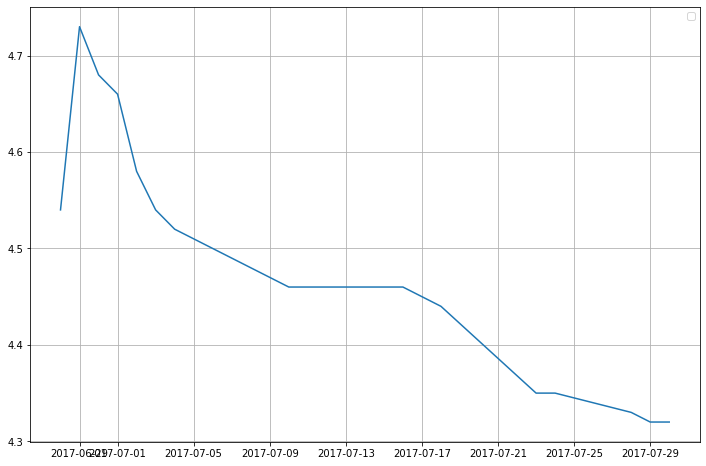

In [22]:
temp = movieDF.query('name == ["리얼"]')

plt.figure(figsize=(12, 8)) # 그래프의 크기를 지정하여 만들어준다.
plt.plot(temp['date'], temp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

##### 다른 영화도 날짜 변화에 따른 평점 변화를 시각화 해보자

In [23]:
# 영화별 날짜 변화에 따른 평점 변화 시각화 (실습)

movie_date_point_pivot = pd.pivot_table(movieDF, index=['date'], columns=['name'], values=['point'])
movie_date_point_pivot

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
...          ...   ...      ...          ...         ...      ...  ...   
2017-08-04   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-05   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-06   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-07   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-08   NaN  7.38     8.39          NaN        7.85      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   
...                ...                ...  ...  ...        ...         ...   
2017-08-04         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-05         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-06         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-07         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-08         NaN                NaN  NaN  ...        NaN         NaN   

                                                                           \
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕   헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱   
date                                                                        
2017-05-01  8.78          8.89   NaN   8.70   NaN   NaN              9.20   
2017-05-02  8.78          8.89   NaN   8.68   NaN   NaN              9.21   
2017-05-03  8.78          8.89   NaN   8.70   NaN   NaN              9.22   
2017-05-04  8.78           NaN   NaN   8.67   NaN   NaN              9.23   
2017-05-05  8.78           NaN   NaN   8.69   NaN   NaN              9.24   
...          ...           ...   ...    ...   ...   ...               ...   
2017-08-04   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-05   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-06   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-07   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-08   NaN           NaN   NaN    NaN  9.18   NaN               NaN   

                   
name       히든 피겨스  
date               
2017-05-01   9.38  
2017-05-02   9.37  
2017-05-03   9.38  
2017-05-04   9.38  
2017-05-05   9.37  
...           ...  
2017-08-04    NaN  
2017-08-05    NaN  
2017-08-06    NaN  
2017-08-07    NaN  
2017-08-08    NaN  

[100 rows x 204 columns]

In [24]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


In [135]:
movie_date_point_pivot

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
...          ...   ...      ...          ...         ...      ...  ...   
2017-08-04   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-05   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-06   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-07   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-08   NaN  7.38     8.39          NaN        7.85      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   
...                ...                ...  ...  ...        ...         ...   
2017-08-04         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-05         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-06         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-07         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-08         NaN                NaN  NaN  ...        NaN         NaN   

                                                                           \
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕   헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱   
date                                                                        
2017-05-01  8.78          8.89   NaN   8.70   NaN   NaN              9.20   
2017-05-02  8.78          8.89   NaN   8.68   NaN   NaN              9.21   
2017-05-03  8.78          8.89   NaN   8.70   NaN   NaN              9.22   
2017-05-04  8.78           NaN   NaN   8.67   NaN   NaN              9.23   
2017-05-05  8.78           NaN   NaN   8.69   NaN   NaN              9.24   
...          ...           ...   ...    ...   ...   ...               ...   
2017-08-04   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-05   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-06   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-07   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-08   NaN           NaN   NaN    NaN  9.18   NaN               NaN   

                   
name       히든 피겨스  
date               
2017-05-01   9.38  
2017-05-02   9.37  
2017-05-03   9.38  
2017-05-04   9.38  
2017-05-05   9.37  
...           ...  
2017-08-04    NaN  
2017-08-05    NaN  
2017-08-06    NaN  
2017-08-07    NaN  
2017-08-08    NaN  

[100 rows x 204 columns]

In [25]:
movie_date_point_pivot.columns = movie_date_point_pivot.columns.droplevel() ## 이건뭐지?

In [133]:
movie_date_point_pivot

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-04,NaN,7.40,8.39,NaN,7.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.18,NaN,NaN,NaN
2017-08-05,NaN,7.40,8.39,NaN,7.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.18,NaN,NaN,NaN
2017-08-06,NaN,7.39,8.39,NaN,7.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.18,NaN,NaN,NaN


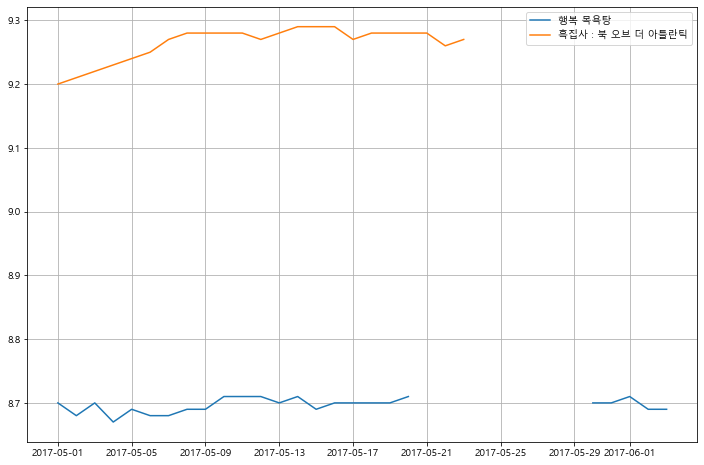

In [26]:
target_col = ['행복 목욕탕', '흑집사 : 북 오브 더 아틀란틱']

plt.figure(figsize=(12, 8)) 
plt.plot(movie_date_point_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()